## 서울 아파트 분양가 분석

In [4]:
# library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# csv read
first_file_name = '전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv' #2013~2015.08
last_file_name = '주택도시보증공사_전국 평균 분양가격(2019년 12월).csv' #2015.09~2019.12

df_first = pd.read_csv(first_file_name, encoding="euc-kr") # utf-8
df_last = pd.read_csv(last_file_name, encoding="euc-kr")

display(df_first, df_last)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


,지역명,규모구분,연도,월,분양가격(㎡)
0,서울,전체,2015,10,5841
1,서울,전용면적 60㎡이하,2015,10,5652
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721
4,서울,전용면적 102㎡초과,2015,10,5879
...,...,...,...,...,...
4330,제주,전체,2019,12,3882
4331,제주,전용면적 60㎡이하,2019,12,NaN
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN


In [7]:
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [8]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4335 entries, 0 to 4334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4335 non-null   object
 1   규모구분     4335 non-null   object
 2   연도       4335 non-null   int64 
 3   월        4335 non-null   int64 
 4   분양가격(㎡)  4058 non-null   object
dtypes: int64(2), object(3)
memory usage: 169.5+ KB


In [9]:
df_last.isna().sum()

지역명          0
규모구분         0
연도           0
월            0
분양가격(㎡)    277
dtype: int64

In [11]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors='coerce')

# errors
# - ignore: 변경할 수 없는 데이터면 -> 원본 데이터 그대로 반환
# - coerce: 변경할 수 없는 데이터면 -> NaN 으로 반환.
# - raise: numeric으로 변경할 수 없는 경우 오류가 발생하며 작업 중단

In [14]:
df_last['평당분양가격'] = df_last['분양가격'] * 3.3 # (1평=> 3.3m2)

In [15]:
df_last.head(5)

,지역명,규모구분,연도,월,분양가격(㎡),분양가격,평당분양가격
0,서울,전체,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60㎡이하,2015,10,5652,5652.0,18651.6
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882,5882.0,19410.6
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721,5721.0,18879.3
4,서울,전용면적 102㎡초과,2015,10,5879,5879.0,19400.7


In [16]:
df_first.head(5)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [18]:
df_last['분양가격'].describe()

count     3957.000000
mean      3238.128633
std       1264.309933
min       1868.000000
25%       2441.000000
50%       2874.000000
75%       3561.000000
max      12728.000000
Name: 분양가격, dtype: float64

In [19]:
df_last['규모구분'].unique()

array(['전체', '전용면적 60㎡이하', '전용면적 60㎡초과 85㎡이하', '전용면적 85㎡초과 102㎡이하',
       '전용면적 102㎡초과'], dtype=object)

In [28]:
# 규모구분 데이터에서 
# (1) 전용면적,이하 문자열을 제거하고
# (2) 초과 문자열을 ~로 변경
# (3) 빈 문자열 제거
# array(['전체', '60㎡', '60㎡~85㎡', '85㎡~102㎡', '102㎡~'], dtype=object)

df_last['전용면적'] = df_last['규모구분'].str.replace("전용면적", "")
df_last['전용면적'] = df_last['전용면적'].str.replace("이하", "")
df_last['전용면적'] = df_last['전용면적'].str.replace("초과", "~")
df_last['전용면적'] = df_last['전용면적'].str.replace(" ", "")

df_last['전용면적']

0             전체
1            60㎡
2        60㎡~85㎡
3       85㎡~102㎡
4          102㎡~
          ...   
4330          전체
4331         60㎡
4332     60㎡~85㎡
4333    85㎡~102㎡
4334       102㎡~
Name: 전용면적, Length: 4335, dtype: object

In [30]:
df_last = df_last.drop(['분양가격(㎡)', '규모구분'], axis=1)
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [35]:
# 지역별 평당분양가격의 기술통계값을 보고싶다.
df_last.groupby(["지역명"])['평당분양가격'].describe()

,count,mean,std,min,25%,50%,75%,max
지역명,,,,,,,,
강원,242.0,7890.750000,1044.359840,6639.6,7165.950,7581.75,8281.350,11873.4
경기,250.0,13356.895200,1969.310711,10160.7,11729.025,13168.65,14600.025,18711.0
경남,247.0,9268.778138,1356.695327,7260.0,8233.500,9187.20,9698.700,14199.9
경북,241.0,8376.536515,850.823275,6949.8,7728.600,8335.80,8824.200,11408.1
광주,201.0,9951.535821,1506.593261,7428.3,9068.400,9527.10,10800.900,16107.3
대구,242.0,11980.895455,2018.395637,8259.9,10399.950,11904.75,13330.350,17021.4
대전,198.0,10253.333333,2245.370020,8002.5,8580.000,9401.70,11615.175,16094.1
부산,250.0,12087.121200,1447.322754,9669.0,10709.325,12338.70,12972.300,15255.9
서울,250.0,23599.976400,3969.953218,16701.3,21318.825,22497.75,25072.575,42002.4


In [36]:
# 전용면적별 평당분양가격의 평균값은 어떻게 될까?
df_last.groupby(['전용면적'])['평당분양가격'].mean()

전용면적
102㎡~       11517.705634
60㎡         10375.137421
60㎡~85㎡     10271.040071
85㎡~102㎡    11097.599573
전체          10276.086207
Name: 평당분양가격, dtype: float64

In [43]:
# 지역별 전용면적의 평당분양가격 평균값을 df로 나타내시오.
df_last.groupby(['지역명', '전용면적'])['평당분양가격'].mean().unstack()

전용면적,102㎡~,60㎡,60㎡~85㎡,85㎡~102㎡,전체
지역명,,,,,
강원,8311.380000,7567.098000,7485.588000,8749.557143,7477.536000
경기,14771.790000,13251.744000,12523.566000,13677.774000,12559.602000
경남,10358.363265,8689.175000,8618.676000,10017.612000,8658.672000
경북,9157.302000,7883.172000,8061.372000,8773.814634,8078.532000
광주,11041.532432,9430.666667,9910.692000,9296.100000,9903.630000
대구,13087.338000,11992.068000,11778.690000,11140.642857,11771.298000
대전,14876.871429,9176.475000,9711.372000,9037.430769,9786.018000
부산,13208.250000,11353.782000,11864.820000,12072.588000,11936.166000
서울,23446.038000,23212.794000,22786.830000,25943.874000,22610.346000


In [48]:
# 지역명이 인덱스, 연도별이 컬럼 -> 연도별 평당 분양가격의 평균값은?

df_last.groupby(['연도', '지역명'])['평당분양가격'].mean().unstack().transpose()

연도,2015,2016,2017,2018,2019
지역명,,,,,
강원,7188.060,7162.903846,7273.560000,8219.255000,8934.475000
경기,11060.940,11684.970000,12304.980000,14258.420000,15665.540000
경남,8459.220,8496.730000,8786.760000,9327.670000,10697.615789
경북,7464.160,7753.405000,8280.800000,8680.776923,9050.250000
광주,7916.700,9190.683333,9613.977551,9526.953333,12111.675000
대구,9018.900,10282.030000,12206.700000,12139.252632,14081.650000
대전,8190.600,8910.733333,9957.158491,10234.106667,12619.200000
부산,10377.400,10743.535000,11560.680000,12889.965000,13537.865000
서울,20315.680,21753.435000,21831.060000,23202.245000,28286.830000


In [49]:
df_last_pivot = pd.pivot_table(df_last, index=['전용면적'], columns=['연도'], values=['평당분양가격'])

In [53]:
df_last_pivot['평당분양가격'][2015]

전용면적
102㎡~       9837.226667
60㎡         8951.525000
60㎡~85㎡     8891.817647
85㎡~102㎡    9518.506250
전체          8893.047059
Name: 2015, dtype: float64

In [58]:
plt.rcParams['font.family'] = "AppleGothic" # Mac

<AxesSubplot:xlabel='전용면적'>

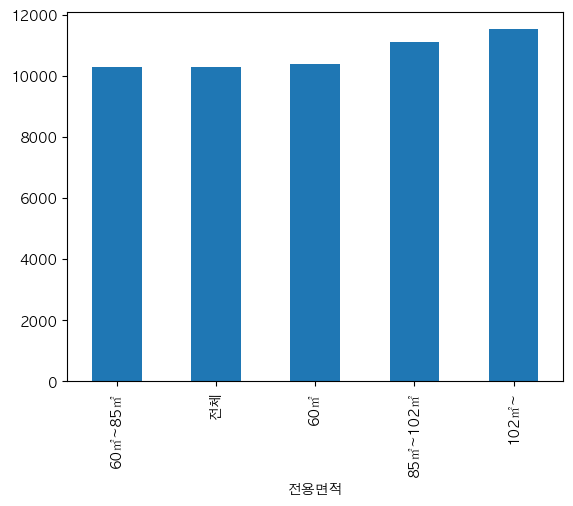

In [59]:
df_last.groupby(['전용면적'])['평당분양가격'].mean().sort_values().plot.bar()

<AxesSubplot:xlabel='연도'>

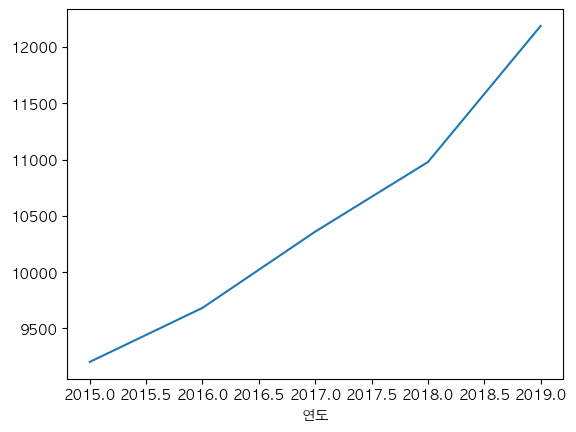

In [60]:
df_last.groupby(['연도'])['평당분양가격'].mean().plot()

<AxesSubplot:>

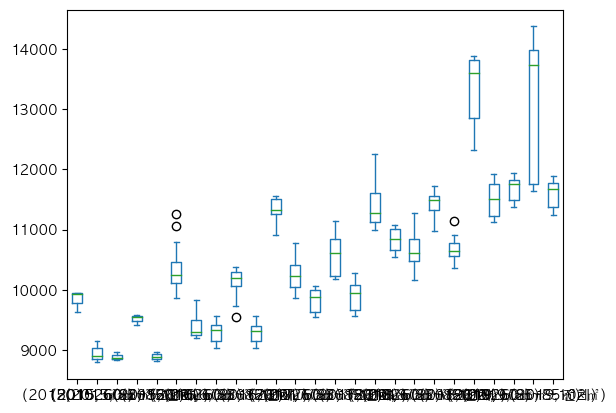

In [63]:
df_last.pivot_table(index='월', columns=['연도', '전용면적'], values='평당분양가격').plot.box()

<AxesSubplot:xlabel='월'>

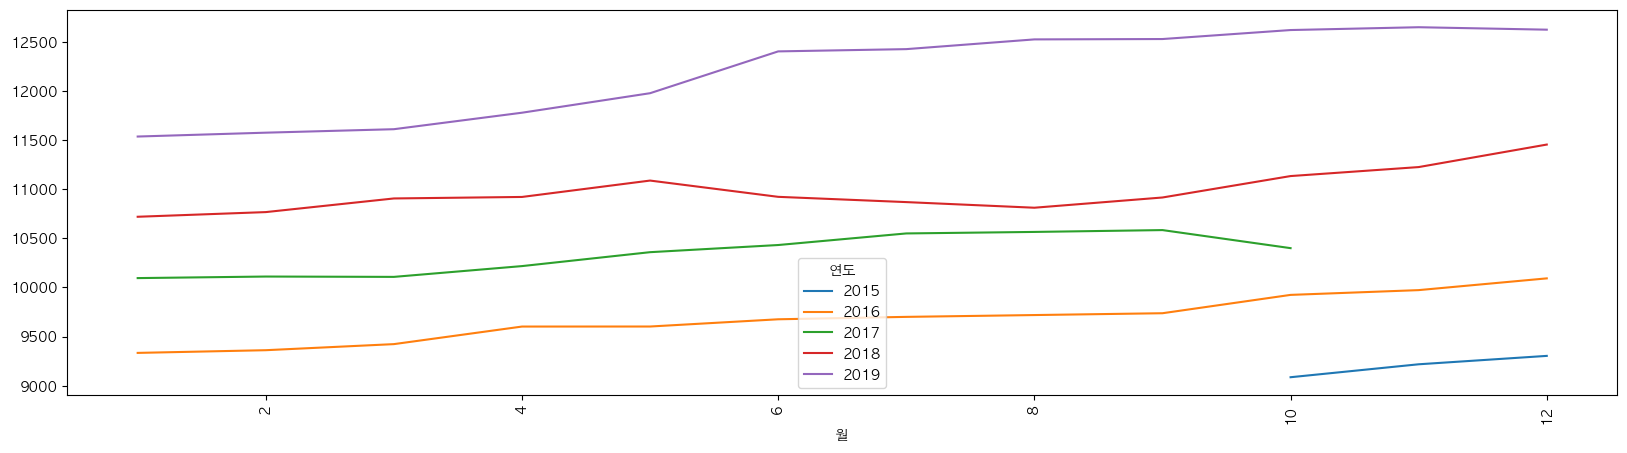

In [64]:
# 연도별 월에 따른 평당분양가격 변화 추이
df_last.pivot_table(index="월", columns=["연도"], values="평당분양가격").plot(figsize=(20,5), rot=90)

In [66]:
import seaborn as sns

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

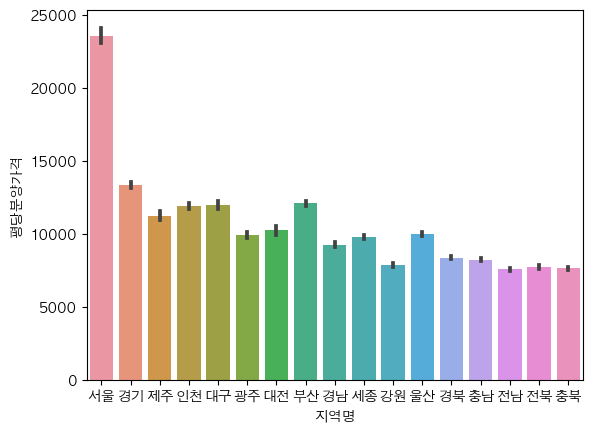

In [72]:
df_last_sorted = df_last.sort_values(by='평당분양가격', ascending=False)
sns.barplot(data=df_last_sorted, x='지역명', y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

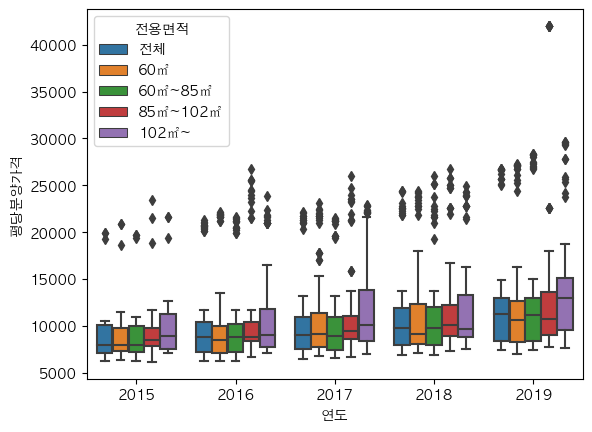

In [73]:
sns.boxplot(data=df_last, x="연도", y="평당분양가격", hue="전용면적")

In [76]:
max_price = df_last['평당분양가격'].max()

In [77]:
df_last[df_last['평당분양가격'] == max_price]

,지역명,연도,월,분양가격,평당분양가격,전용면적
3743,서울,2019,6,12728.0,42002.4,85㎡~102㎡
3828,서울,2019,7,12728.0,42002.4,85㎡~102㎡
3913,서울,2019,8,12728.0,42002.4,85㎡~102㎡
3998,서울,2019,9,12728.0,42002.4,85㎡~102㎡
4083,서울,2019,10,12728.0,42002.4,85㎡~102㎡
4168,서울,2019,11,12728.0,42002.4,85㎡~102㎡
4253,서울,2019,12,12728.0,42002.4,85㎡~102㎡


In [79]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [80]:
df_first

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,...,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079
6,울산,8090,8090,8090,8153,8153,8153,8153,8153,8493,...,8891,8891,8526,8526,8629,9380,9192,9190,9190,9215
7,경기,10855,10855,10791,10784,10876,10646,10266,10124,10134,...,10356,10379,10391,10355,10469,10684,10685,10573,10518,10573
8,세종,7601,7600,7532,7814,7908,7934,8067,8067,8141,...,8592,8560,8560,8560,8555,8546,8546,8671,8669,8695
9,강원,6230,6230,6230,6141,6373,6350,6350,6268,6268,...,6365,6365,6348,6350,6182,6924,6846,6986,7019,7008


In [81]:
df_last

,지역명,연도,월,분양가격,평당분양가격,전용면적
0,서울,2015,10,5841.0,19275.3,전체
1,서울,2015,10,5652.0,18651.6,60㎡
2,서울,2015,10,5882.0,19410.6,60㎡~85㎡
3,서울,2015,10,5721.0,18879.3,85㎡~102㎡
4,서울,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...
4330,제주,2019,12,3882.0,12810.6,전체
4331,제주,2019,12,NaN,NaN,60㎡
4332,제주,2019,12,3898.0,12863.4,60㎡~85㎡
4333,제주,2019,12,NaN,NaN,85㎡~102㎡


In [82]:
# 가로 방향의 데이터 프레임 => 세로 방향으로 전환
df_first_melt = df_first.melt(id_vars='지역', var_name='기간', value_name="평당분양가격")
df_first_melt

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098
...,...,...,...
352,전북,2015년8월,6580
353,전남,2015년8월,6289
354,경북,2015년8월,7037
355,경남,2015년8월,7665


In [89]:
# 2013년1월
# 2013년2월

date = "2013년12월"

# 숫자 데이터만 표현
year = date.split("년")[0]

month = date.split("년")[1].replace("월", "")
print(year, month)

2013 12


In [93]:
def parse_year(date):
    year = date.split("년")[0]
    return year

def parse_month(date):
    month = date.split("년")[1].replace("월", "")
    return month

In [94]:
# 기간 컬럼에서 => 년, 월로 데이터를 각각 컬럼 별로 분리
df_first_melt['연도'] = df_first_melt['기간'].apply(parse_year)
df_first_melt['월'] = df_first_melt['기간'].apply(parse_month)

In [101]:
# df_last에서 전용면적이 '전체'인 데이터만 가져오시오.
# 단, 컬럼은 지역명, 연도, 월, 평당분양가격만 가져오시오.
df_last[df_last['전용면적'] == "전체"][['지역명', '연도', '월', '평당분양가격']]

df_last_prepare = df_last.loc[df_last['전용면적'] == "전체", ['지역명', '연도', '월', '평당분양가격']]

df_last_prepare

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
4310,전북,2019,12,8144.4
4315,전남,2019,12,8091.6
4320,경북,2019,12,9616.2
4325,경남,2019,12,10107.9


In [102]:
df_first_melt

,지역,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8
